In [36]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [38]:
result = {}
for n in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]: #4096
    result[n] = {}
    for degree in [2, 3, 5, 10]:
        result[n][degree] = {}
        my_range = np.linspace(0.5 *degree*np.log2(n), 3 * degree*np.log2(n), 20)
        m_list = [int(a) for a in my_range]
        for m in m_list:
            result[n][degree][m] = []
            for try_no in range(20):
                with open(f"results/n={n}_m={m}_d={degree}_{try_no}.json") as f:
                    data = json.loads(f.read())
                    result[n][degree][m].append(data)

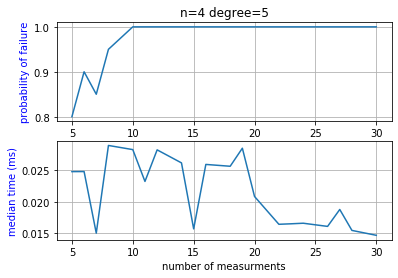

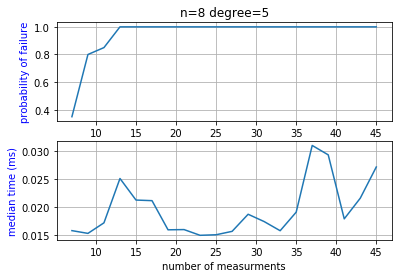

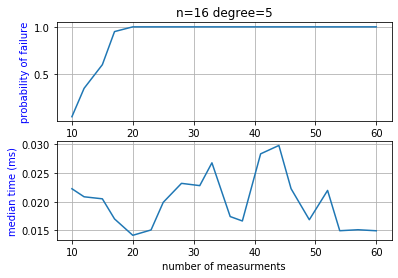

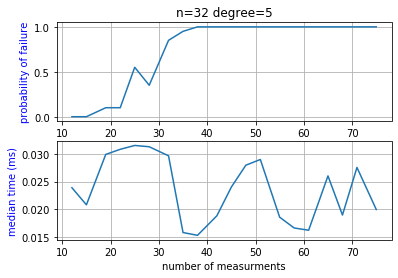

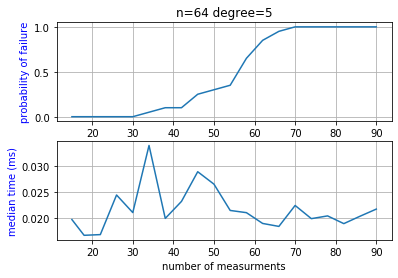

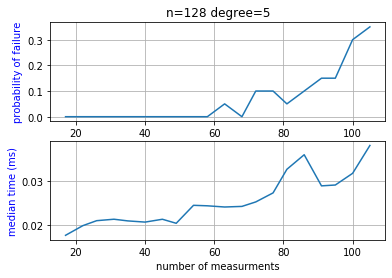

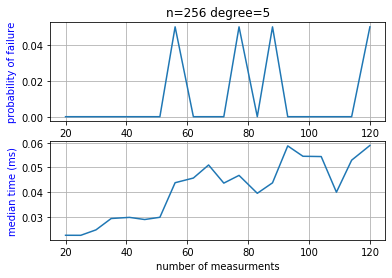

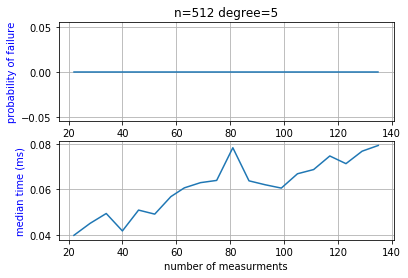

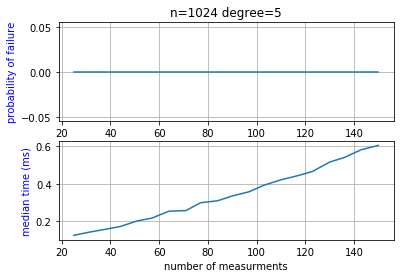

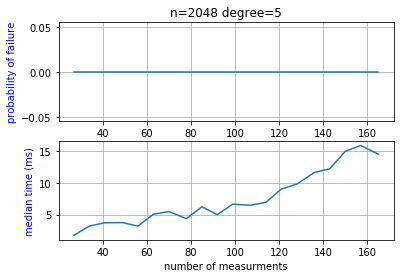

In [40]:
# failure rates
for n in result:
    for degree in [5]:
        no_measurements , p_failure, time  = [], [], []
        for m in result[n][degree]:
            p = sum([1 for j in range(20) if result[n][degree][m][j]["status"]==True])/20
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(20)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of failure", color="blue")
        ax1.set_xlabel("number of measurments")
        ax1.plot(no_measurements, p_failure)
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        
        ax2.set_ylabel("median time (ms)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        
        
        
        plt.show()
           